# import lib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# import kepler data

In [9]:
df = pd.read_csv('tabular_data/cumulative_2025.10.02_21.17.01.csv')
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Columns: 141 entries, rowid to koi_dikco_msky_err
dtypes: float64(117), int64(7), object(17)
memory usage: 10.3+ MB


In [11]:
print('Columns:', list(df.columns))

Columns: ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1', 'koi_time0_err2', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp', 'koi_longp_err1', 'koi_longp_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_ingress', 'koi_ingress_err1', 'koi_ingress_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_ror', 'koi_ror_err1', 'koi_ror_err2', 'koi_srho', 'koi_srho_err1', 'koi_srho_err2', 'koi_fittype', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_sma', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_inso

In [12]:
print(df.isna().sum().to_string())

rowid                    0
kepid                    0
kepoi_name               0
kepler_name           6817
koi_disposition          0
koi_vet_stat             0
koi_vet_date             0
koi_pdisposition         0
koi_score             1510
koi_fpflag_nt            0
koi_fpflag_ss            0
koi_fpflag_co            0
koi_fpflag_ec            0
koi_disp_prov            0
koi_comment           1209
koi_period               0
koi_period_err1        454
koi_period_err2        454
koi_time0bk              0
koi_time0bk_err1       454
koi_time0bk_err2       454
koi_time0                0
koi_time0_err1         454
koi_time0_err2         454
koi_eccen              363
koi_eccen_err1        9564
koi_eccen_err2        9564
koi_longp             9564
koi_longp_err1        9564
koi_longp_err2        9564
koi_impact             363
koi_impact_err1        454
koi_impact_err2        454
koi_duration             0
koi_duration_err1      454
koi_duration_err2      454
koi_ingress           9564
k

In [13]:
print('Total rows:', len(df))

Total rows: 9564


In [18]:
df['koi_disposition_flag'] = df['koi_disposition'].map({
    'CANDIDATE': '0',
    'CONFIRMED': '2',
    'FALSE POSITIVE': '1'
})
df[['koi_disposition', 'koi_disposition_flag']].head()

,koi_disposition,koi_disposition_flag
0,CONFIRMED,2
1,CONFIRMED,2
2,CANDIDATE,0
3,FALSE POSITIVE,1
4,CONFIRMED,2


In [ ]:
print(df['koi_disposition'].value_counts())


koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


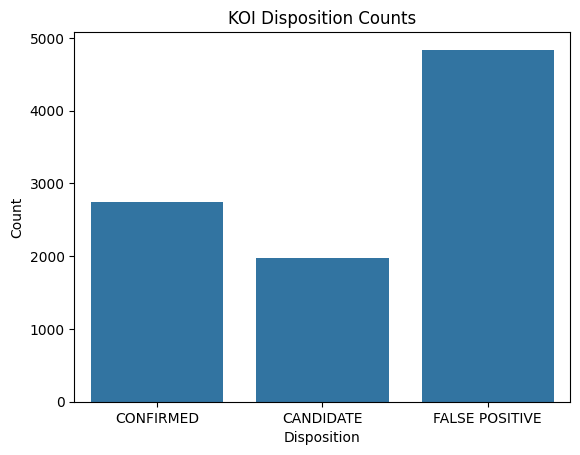

In [ ]:
sns.countplot(data=df, x='koi_disposition')
plt.title('KOI Disposition Counts')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

# baseline data and model

In [23]:
baseline_df = df.loc[:, ~df.columns.str.contains('err1|err2|err')]

In [26]:
baseline_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,koi_disposition_flag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,2
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,0
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,1
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070,2


In [25]:
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rowid                 9564 non-null   int64  
 1   kepid                 9564 non-null   int64  
 2   kepoi_name            9564 non-null   object 
 3   kepler_name           2747 non-null   object 
 4   koi_disposition       9564 non-null   object 
 5   koi_vet_stat          9564 non-null   object 
 6   koi_vet_date          9564 non-null   object 
 7   koi_pdisposition      9564 non-null   object 
 8   koi_score             8054 non-null   float64
 9   koi_fpflag_nt         9564 non-null   int64  
 10  koi_fpflag_ss         9564 non-null   int64  
 11  koi_fpflag_co         9564 non-null   int64  
 12  koi_fpflag_ec         9564 non-null   int64  
 13  koi_disp_prov         9564 non-null   object 
 14  koi_comment           8355 non-null   object 
 15  koi_period           